In [ ]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [ ]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

## **데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처: [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data) `Credit Card Dataset`

- 데이터 명세

| No. | 표준항목명             | 영문명                     | 설명                                                                           | 표현형식/단위  | 예시          |
|-----|------------------|---------------------|-----------------------------------------------------------------------------|-------------|-------------|
| 1   | 고객 ID             | CUST_ID               | 고객을 식별하기 위한 고유 ID                                                           | -           | C10001      |
| 2   | 잔액                | BALANCE               | 신용카드 계좌의 현재 잔액                                                               | N           | 40.9        |
| 3   | 잔액 업데이트 빈도     | BALANCE_FREQUENCY     | 잔액이 업데이트 되는 빈도                                                             | N           | 0.818       |
| 4   | 총 구매액            | PURCHASES             | 신용카드로 이루어진 총 구매액                                                          | N           | 95.4        |
| 5   | 일회성 구매액         | ONEOFF_PURCHASES      | 일회성으로 이루어진 구매액                                                             | N           | 0.0         |
| 6   | 할부 구매액           | INSTALLMENTS_PURCHASES | 할부로 이루어진 구매액                                                               | N           | 95.4        |
| 7   | 현금 서비스 금액       | CASH_ADVANCE          | 현금 서비스로 인출한 금액                                                              | N           | 0.0         |
| 8   | 구매 빈도             | PURCHASES_FREQUENCY    | 구매가 이루어진 빈도                                                                 | N           | 0.167       |
| 9   | 일회성 구매 빈도       | ONEOFF_PURCHASES_FREQUENCY | 일회성 구매가 이루어진 빈도                                                           | N           | 0.0         |
| 10  | 할부 구매 빈도         | PURCHASES_INSTALLMENTS_FREQUENCY | 할부 구매가 이루어진 빈도                                                         | N           | 0.083       |
| 11  | 현금 서비스 빈도       | CASH_ADVANCE_FREQUENCY  | 현금 서비스가 이루어진 빈도                                                           | N           | 0.0         |
| 12  | 현금 서비스 거래 횟수   | CASH_ADVANCE_TRX       | 현금 서비스 거래의 횟수                                                             | N           | 0           |
| 13  | 구매 횟수             | PURCHASES_TRX         | 총 구매 거래의 횟수                                                                | N           | 2           |
| 14  | 신용 한도             | CREDIT_LIMIT          | 신용카드의 신용 한도                                                                | N           | 1000.0      |
| 15  | 지불액               | PAYMENTS              | 신용카드 계좌에 지불한 총 금액                                                        | N           | 201.8       |
| 16  | 최소 지불액           | MINIMUM_PAYMENTS      | 신용카드 계좌의 최소 지불액                                                           | N           | 139.5       |
| 17  | 전액 지불 비율        | PRC_FULL_PAYMENT      | 신용카드 결제 금액 중 전액을 지불한 비율                                                  | N           | 0.0         |
| 18  | 카드 소지 기간         | TENURE                | 신용카드 계좌를 소지한 기간 (월)                                                       | N           | 12          |



In [ ]:
# 데이터 불러오기
data = pd.read_csv("./CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## 데이터 파악 및 EDA (6문제)

### 문제1: 데이터셋 기본 정보 확인하기
- 데이터프레임의 기본 정보를 확인하고, 각 변수의 데이터 타입과 결측치 유무를 파악하세요.

In [ ]:
# 데이터프레임의 기본 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- 데이터프레임의 총 행 수와 열 수, 각 변수의 데이터 타입 및 결측치 여부를 확인할 수 있습니다.
- MINIMUM_PAYMENTS와 CREDIT_LIMIT 변수에 결측치가 있습니다.

### 문제2: 기술 통계량 계산하기
각 변수의 기술 통계량을 계산하여 평균, 표준편차, 최소값, 최대값 등을 파악하세요.

In [ ]:
# 각 변수의 기술 통계량 계산


### 문제3 : 중복값 확인하기
- 데이터프레임에서 중복값이 있는 지 확인해보세요. 있다면 중복값을 제거하세요.  

### 문제4: 결측치 파악하기
- 데이터프레임에서 결측치가 존재하는 부분을 시각화해보세요.

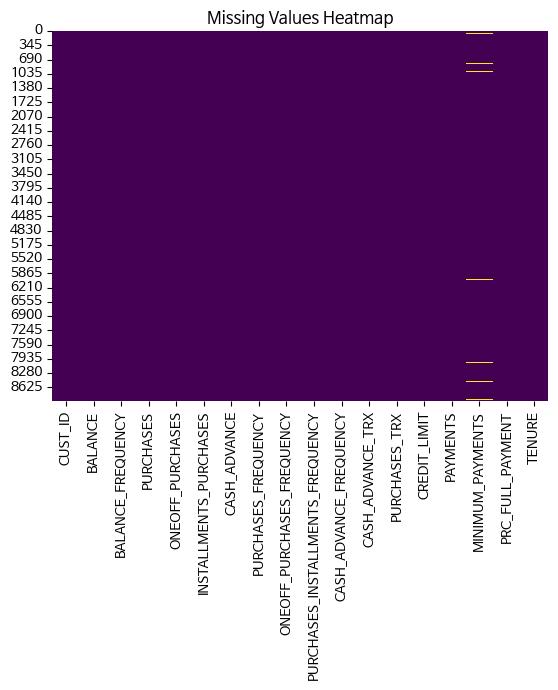

### 문제5: 데이터 분포 시각화하기 - 히스토그램
각 변수의 데이터 분포를 히스토그램으로 시각화하세요.

In [ ]:
# 히스토그램 시각화


### 문제6: 데이터의 이상치 파악하기
- 데이터의 이상치를 파악하세요. 이를 위해 각 변수의 분포를 상자 그림으로 시각화하세요.

## 데이터 전처리 (3문제)

### 문제7: 결측치 처리하기
-  변수의 결측치 수를 확인하고, 결측치가 존재하는 변수들을 적절한 방법으로 전처리하세요.

### 문제8: 이상치 처리하기

- 데이터에 이상치가 있는지 확인해보세요. 확인 후, 전처리가 필요하다면 진행해주세요.

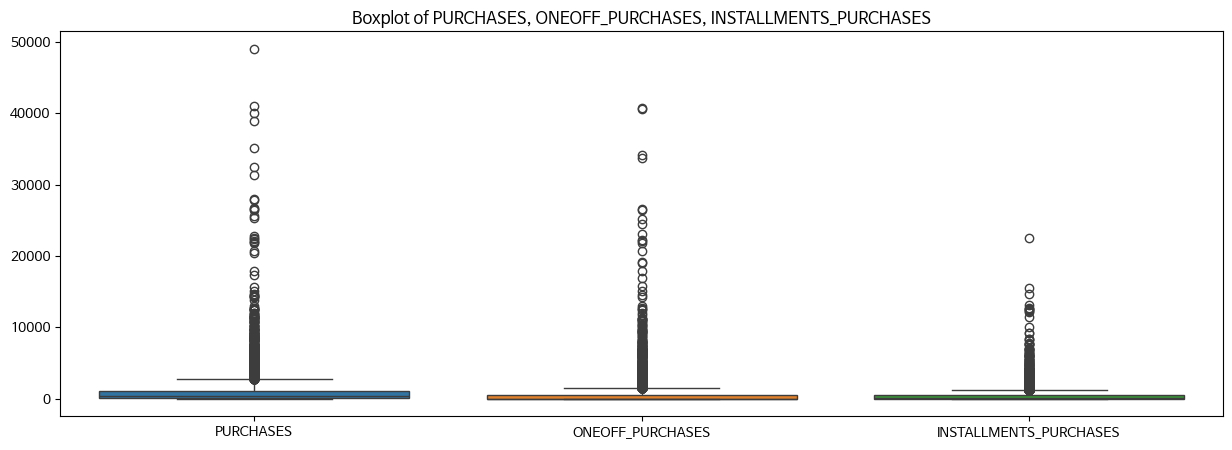

In [ ]:
# 이상치 제거 전 시각화

In [ ]:
# 이상치 제거 (전처리 진행)

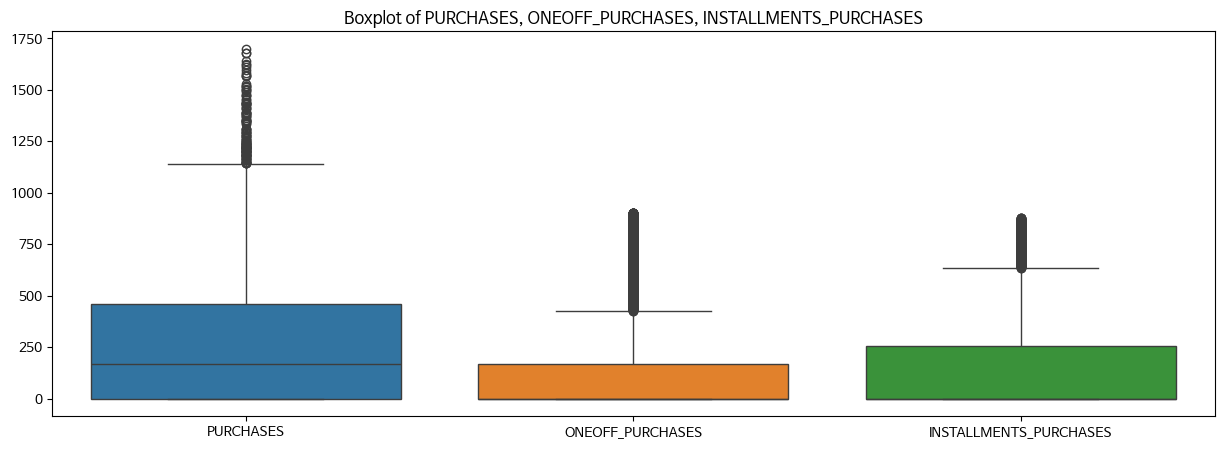

In [ ]:
# 이상치 제거 후 시각화


### 문제9: 데이터 스케일링하기
- 각 변수의 데이터를 표준화 혹은 정규화하세요.

- 표준화는 데이터의 평균을 0, 표준편차를 1로 맞추어 변환합니다.
- 정규화는 데이터 값을 0과 1 사이로 변환합니다.
- 표준화와 정규화는 모델 학습의 성능을 향상시킬 수 있습니다.

이후 분석은 표준화된 데이터를 바탕으로 진행하겠습니다.

## 클러스터 분석 (11문제)

###문제10: K-means 클러스터링 모델 학습
- K-means 알고리즘을 사용하여 클러스터링 모델을 학습하세요. 클러스터의 수는 3로 설정하세요.

In [ ]:
from sklearn.cluster import KMeans


Cluster_Kmeans
2    3286
0    2363
1     941
Name: count, dtype: int64


### 문제11 : 클러스터링 결과 시각화 (2D)
- 두 개의 주요 변수(BALANCE, PURCHASES)를 사용하여 클러스터링 결과를 2D로 시각화하세요.

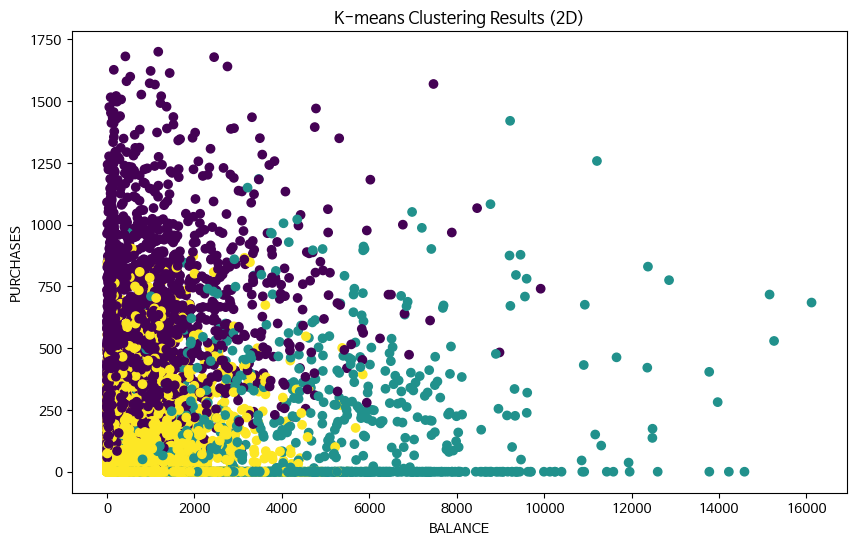

### 문제12: 클러스터 수 결정 (Elbow Method)
- Elbow Method를 사용하여 최적의 클러스터 수를 결정하세요.

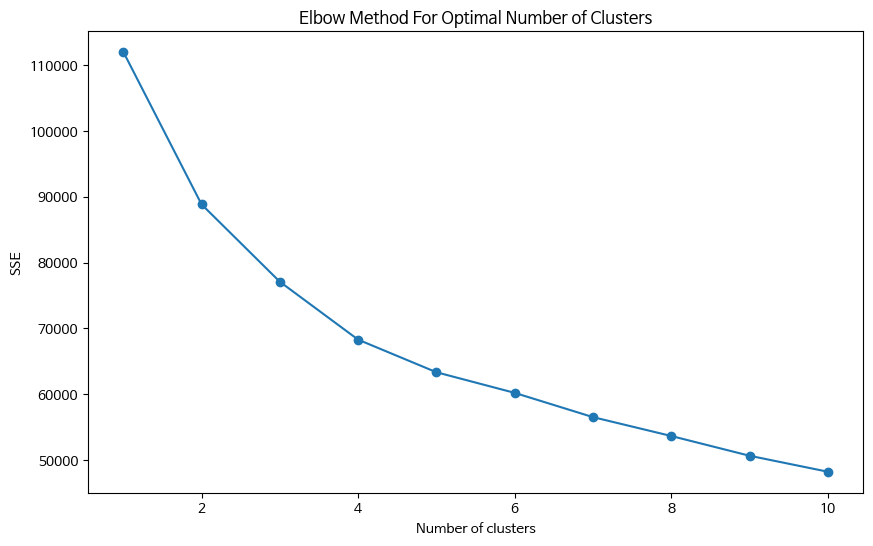

### 문제13 : 결과를 해석해보세요.

- 아래는 클러스터의 수를 5로 진행하고, 2가지 변수(BALANCE, PURCHASES)로 시각화를 한 결과입니다.
- 결과를 보고 추가 분석을 진행하여 인사이트를 발견해보세요. 클러스터 별로 어떤 차이가 있나요?

### 문제14: 계층적 클러스터링 모델 학습 및 덴드로그램 시각화
- 계층적 클러스터링을 scipy를 사용하여 모델을 학습하고, 덴드로그램을 시각화하세요.

### 문제15: DBSCAN 클러스터링 모델 학습
- DBSCAN 알고리즘을 사용하여 클러스터링 모델을 학습하고, 결과를 얻으세요.

### 문제16: DBSCAN 클러스터링 모델 학습 (매개변수 조정)
- DBSCAN의 eps와 min_samples 값을 조정하여, 클러스터링 결과가 개선되도록 하세요.

In [ ]:
# DBSCAN 모델 학습 (매개변수 조정)


Cluster_dbscan_adjusted
-1     3294
 0     3159
 21      10
 10       9
 7        8
 17       8
 4        7
 22       7
 2        7
 19       6
 14       6
 6        6
 13       5
 11       5
 15       5
 18       5
 1        5
 3        5
 23       5
 20       5
 9        5
 5        5
 16       5
 12       4
 8        4
Name: count, dtype: int64


### 문제17: 클러스터링 결과 시각화 및 노이즈 탐지
- DBSCAN 결과를 시각화하고, 노이즈 데이터를 탐지하세요.

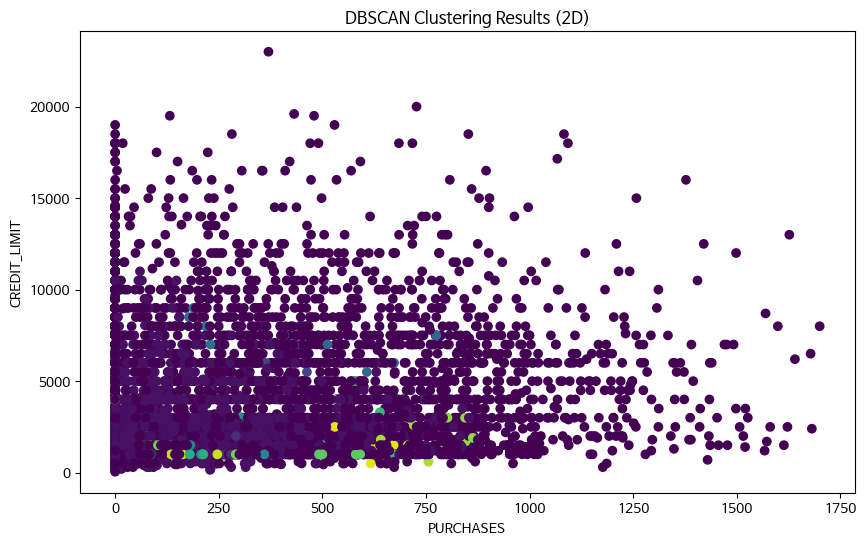

Number of noise points: 3294


In [ ]:
# DBSCAN 결과 시각화 (최적 매개변수 사용 후)


In [ ]:
# 노이즈 데이터 개수 확인



### 문제18: GMM 클러스터링 모델 학습
- Gaussian Mixture Model을 사용하여 클러스터링 모델을 학습하고, 결과를 얻으세요. 클러스터의 수는 3으로 설정하세요.

### 문제19: 클러스터링 결과 시각화 및 클러스터 확률 해석
- GMM 결과를 시각화하고, 각 데이터 포인트의 클러스터 소속 확률을 확인하세요.

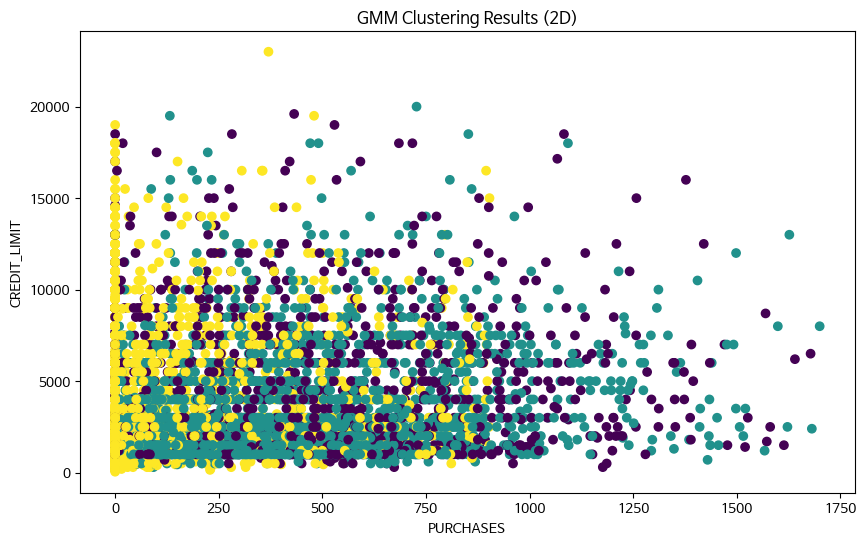

   Cluster_gmm  Cluster_probabilities
0            1                    1.0
1            2                    1.0
2            1                    1.0
4            2                    1.0
7            1                    1.0


### 문제20: 클러스터링 결과 해석 및 비교
- K-means, 계층적 클러스터링, DBSCAN, GMM의 클러스터링 결과를 비교해보세요.
- 각 방법의 장단점, 특징도 고려해서 결과 분석을 진행해보세요.

## PCA (3문제)


### 문제21: PCA의 주성분 계산 및 시각화
- 주성분 분석(PCA)을 사용하여 주성분을 계산하고, 첫 두 주성분을 시각화하세요.

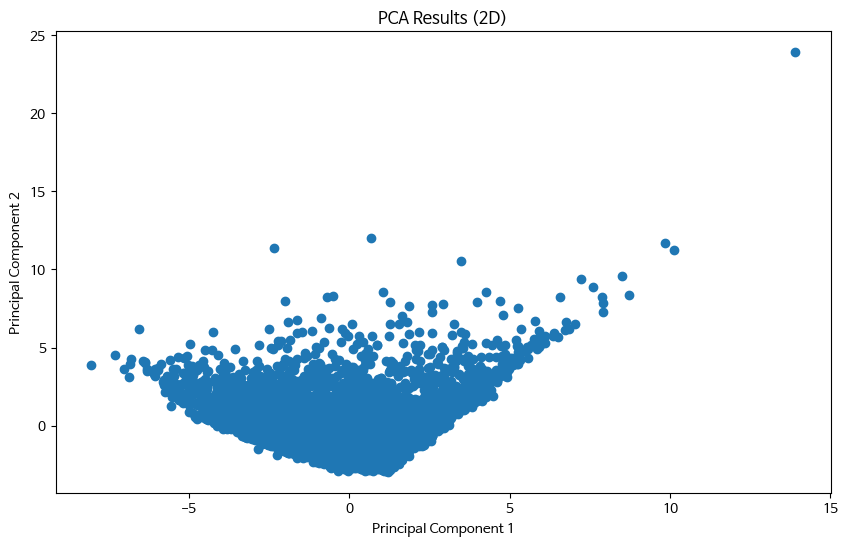

In [ ]:
from sklearn.decomposition import PCA


### 문제22: 적절한 주성분 수 결정
- 적절한 주성분 수를 결정하기 위해, 주성분의 설명력(분산 설명 비율)을 시각화하세요.

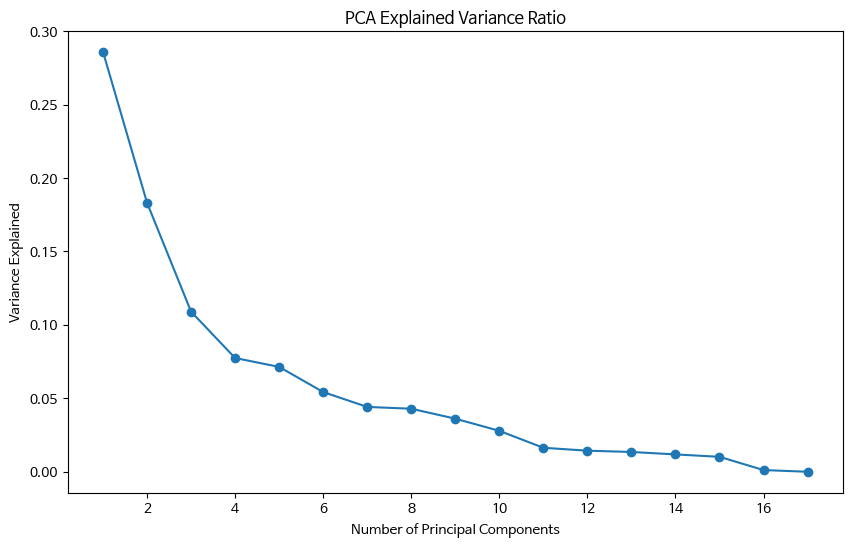

### 문제23: 차원 축소를 활용한 데이터 시각화
- 적절한 주성분 수를 선택한 후, 이를 사용하여 데이터를 저차원으로 변환하세요.
- 시각화가 가능하다면, 데이터 시각화를 진행해주세요.

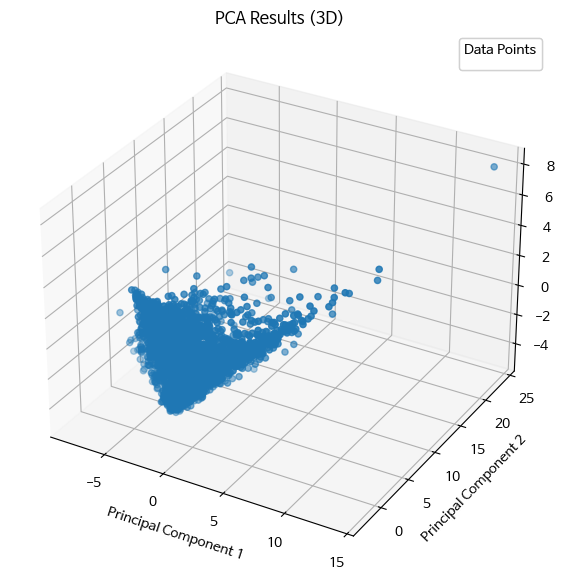

## PCA를 활용한 클러스터링 (6문제)


CUST_ID를 제외하면 분석 중인 데이터에 총 17개의 열이 있습니다. 차원이 너무 많아서 데이터의 분포나 특징을 시각화로 파악하는 것이 어렵네요. 관련하여, PCA를 통해 모든 차원의 특징을 최대한 살리면서, 동시에 데이터의 특징을 한눈에 파악할 수 있도록 2차원으로 차원을 축소해 봅시다.

### 문제24: PCA를 활용한 차원 축소 후 K-means 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 K-means 클러스터링을 수행하고 결과를 분석해보세요.
-  최적의 군집 개수를 Elbow plot를 통해 확인해보세요.


### 문제25 : K-means 결과 해석하기
- 위 클러스터링 결과를 시각화해보세요.
- K-means의 결과를 해석해봅시다.

  - 각 클러스터별로 고객들은 어떤 특징을 가지나요?
  - 위 분석을 토대로 대출 서비스를 제안한다면, 어떤 전략이 좋을까요?

### 문제26 : PCA를 활용한 차원 축소 후 계층적 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 계층적 클러스터링을 수행하고 덴드로그램을 시각화하세요.

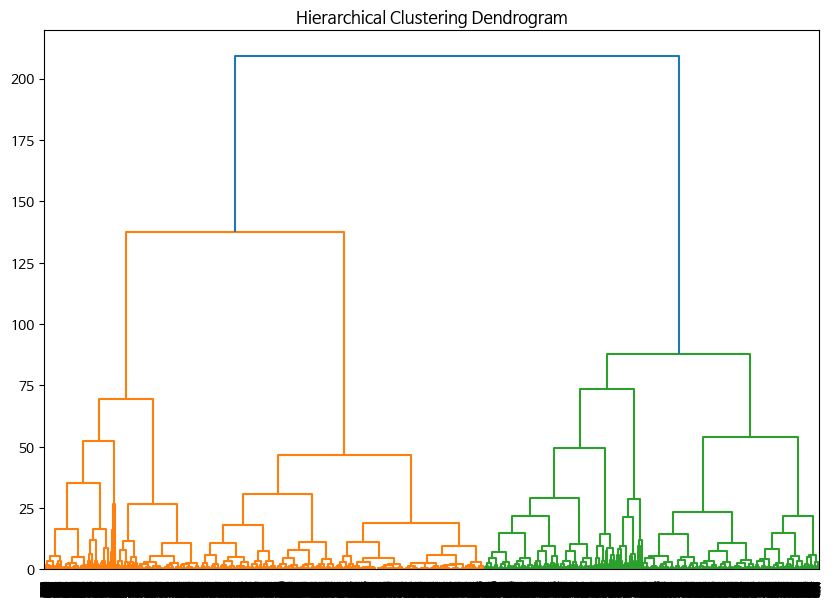

### 문제27 : PCA를 활용한 차원 축소 후 DBSCAN 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 DBSCAN 클러스터링을 수행하고 결과를 시각화하세요.

### 문제28 : PCA를 활용한 차원 축소 후 GMM 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 GMM 클러스터링을 수행하고 결과를 시각화하세요.

### 문제29 : 원본 데이터와 차원 축소 데이터를 사용한 클러스터링 결과 비교
- 원본 데이터와 차원 축소 데이터를 사용하여 다양한 클러스터링 기법을 적용한 결과를 비교해보세요.

In [ ]:
# 위에 분석한 내용을 바탕으로 자유롭게 의견을 작성해주세요.